# Powerline fire study
#### _Finding causes for the rise of wildfire caused by powerline in the US since 2008_

## The rise of powerline fire

### 1 - Set-up

In [2]:
#init
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme(palette='gist_heat_r') #fire theme :eyes:

In [3]:
#data import
df = pd.read_csv('fires.csv', index_col = 'OBJECTID')
df.DISCOVERY_DATE = pd.to_datetime(df.DISCOVERY_DATE) #seting up date format
df.CONT_DATE = pd.to_datetime(df.CONT_DATE) #seting up date format
df.info()

/tmp/ipykernel_260063/3628122664.py:2: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fires.csv', index_col = 'OBJECTID')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880465 entries, 1 to 1880465
Data columns (total 38 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   FOD_ID                      int64         
 1   FPA_ID                      object        
 2   SOURCE_SYSTEM_TYPE          object        
 3   SOURCE_SYSTEM               object        
 4   NWCG_REPORTING_AGENCY       object        
 5   NWCG_REPORTING_UNIT_ID      object        
 6   NWCG_REPORTING_UNIT_NAME    object        
 7   SOURCE_REPORTING_UNIT       object        
 8   SOURCE_REPORTING_UNIT_NAME  object        
 9   LOCAL_FIRE_REPORT_ID        object        
 10  LOCAL_INCIDENT_ID           object        
 11  FIRE_CODE                   object        
 12  FIRE_NAME                   object        
 13  ICS_209_INCIDENT_NUMBER     object        
 14  ICS_209_NAME                object        
 15  MTBS_ID                     object        
 16  MTBS_FIRE_NAME    

In [5]:
#getting ride of unused column
df.drop(['FPA_ID', 'SOURCE_SYSTEM', 'SOURCE_SYSTEM_TYPE', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME','LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'OWNER_CODE', 'OWNER_DESCR', 'FIPS_CODE', 'Shape'], axis=1, inplace=True) #keeping name for further research in newspapers

In [6]:
#getting ride of other fire cause
df_powerline = df.drop(df.loc[df['STAT_CAUSE_DESCR'] != 'Powerline'].index)
df_powerline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 173028 to 1880225
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FOD_ID            14448 non-null  int64         
 1   FIRE_NAME         10815 non-null  object        
 2   MTBS_FIRE_NAME    179 non-null    object        
 3   COMPLEX_NAME      29 non-null     object        
 4   FIRE_YEAR         14448 non-null  int64         
 5   DISCOVERY_DATE    14448 non-null  datetime64[ns]
 6   DISCOVERY_DOY     14448 non-null  int64         
 7   DISCOVERY_TIME    8462 non-null   float64       
 8   STAT_CAUSE_CODE   14448 non-null  float64       
 9   STAT_CAUSE_DESCR  14448 non-null  object        
 10  CONT_DATE         8427 non-null   datetime64[ns]
 11  CONT_DOY          8427 non-null   float64       
 12  CONT_TIME         7826 non-null   float64       
 13  FIRE_SIZE         14448 non-null  float64       
 14  FIRE_SIZE_CLASS

### 2 - Analysis

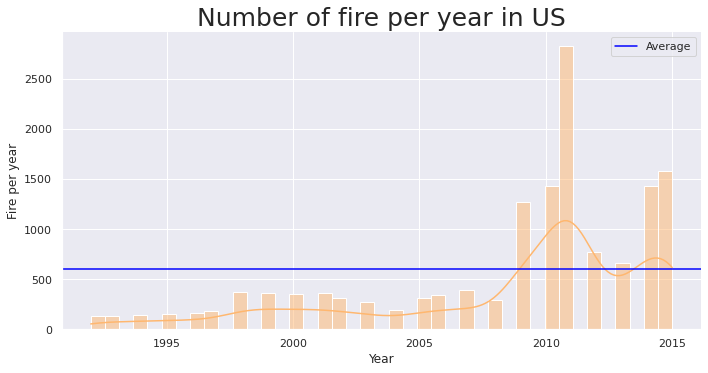

In [41]:
sns.displot(df_powerline['FIRE_YEAR'], kde=True, height=5, aspect=2,);
plt.axhline(y=df_powerline['FIRE_YEAR'].value_counts().mean(),color='blue',label='Average');
plt.xlabel("Year")
plt.ylabel('Fire per year')
plt.title("Number of fire per year in US", fontsize=25)
plt.legend();

Obviously at first sight we have something around 2010.
- What's the year above this average ?
- Is that tendency true for every state ?

In [8]:
df_fire_by_year = df_powerline['FIRE_YEAR'].value_counts()
df_fire_by_year.loc[df_fire_by_year > df_fire_by_year.mean()]

2011    2828
2015    1580
2010    1434
2014    1433
2009    1266
2012     773
2013     666
Name: FIRE_YEAR, dtype: int64

Starting from 2009, every year is above the average

#### 2.1 - State analysis

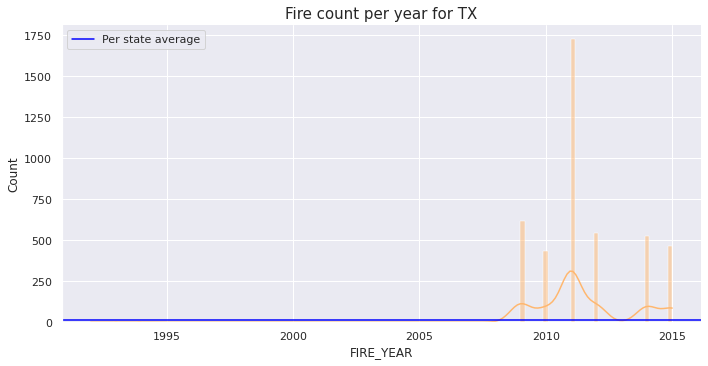

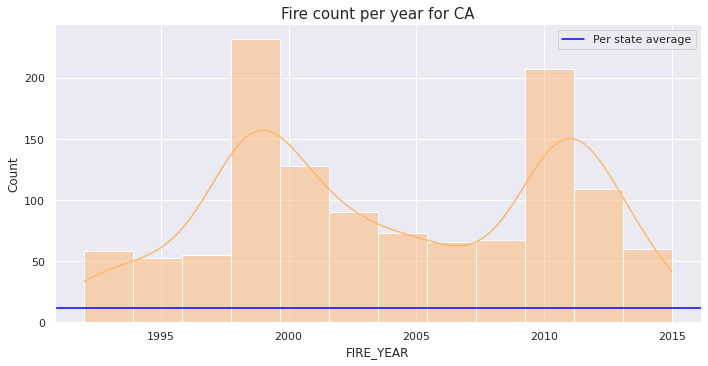

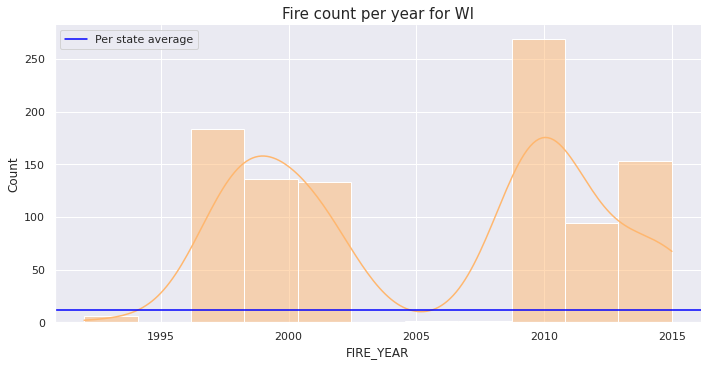

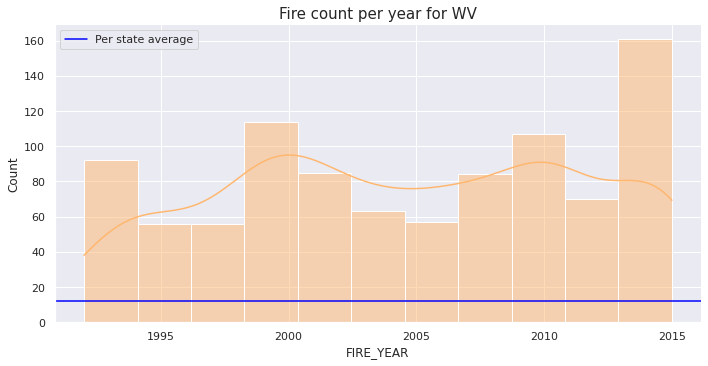

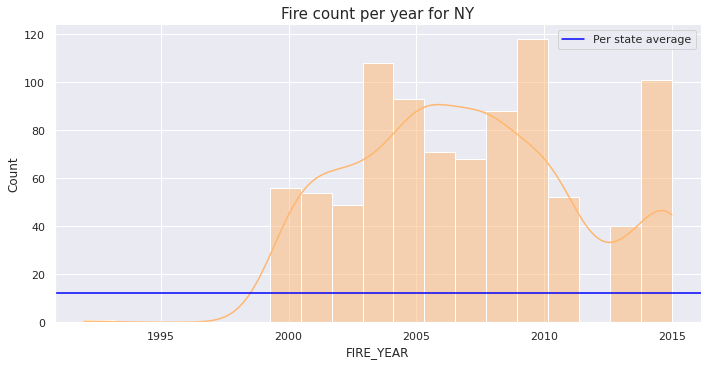

In [40]:
# What we should do if we had more RAM
#for state in df_powerline['STATE']:
#    sns.displot(df_powerline.loc[df_powerline['STATE'] == state, 'FIRE_YEAR'], kde=True, height=5, aspect=2);
#    plt.axhline(y=df_powerline.loc[df_powerline['STATE'] == state, 'FIRE_YEAR'].value_counts().mean(), color='blue', label='Average');
#    plt.legend();

#
Top_state = df_powerline['STATE'].value_counts()
Top_state = Top_state.loc[Top_state > 500]
Top_state = Top_state.index.tolist()

for state in Top_state:
    sns.displot(df_powerline.loc[df_powerline['STATE'] == state, 'FIRE_YEAR'], kde=True, height=5, aspect=2);
    plt.axhline(y=df_powerline['FIRE_YEAR'].value_counts().mean()/50, color='blue', label='Per state average');
    plt.title(f'Fire count per year for {state}', fontsize=15)
    plt.legend();



It seems that text alone is responsible for the huge rise in powerline fire. We need to link it to external data.

### 3 - Texas recipes for wildfire
#### 3.1 - How powerline catch fire
Texas is mainly equipped with aerial lines due to its old network and the cost of the buried line.

**Downed lines** – Powerline could fall to the ground (for many reasons), circuit breakers should be triggered but in 30% of the cases it draws too little current to properly works and the ligne could arc for a long time utile the current is stopped on the line.

**Vegetation Contact** – Trees and other vegetation intruding into power lines can cause fires in multiple ways like a tree falling across a line or a branch touching two conductors.

**Conductor Slap** – Conductors should be sufficiently spaced but under certain conditions (like strong wind) they touch, arc, and spread hot metal particles which can ignite dry vegetation around.

**Apparatus Failures** – Many components on powerlines are designed to serve a certain number of years and should be replaced at regular intervals. If not they fail.
#### 3.2 - Texas has its own power grid
Texas is the only US state with a power grid that's not interconnected to the rest of the country. It's one of the reasons for the 2021 massive power outage. Thus power infrastructure is not monitored at a federal level and is managed inconsistently with the rest of the US.<sup>1</sup>

#### 3.3 - Aging infrastructure
There are reports from many parts of the US showing power utilities sued for neglecting the powerline infrastructure<sup>2</sup>, especially in Texas where a great part of the infrastructure is owned by private companies. By design, they need to give ROI, not operate for the benefit of the most in opposition to state-owed. The result is they're doing the minimum to avoid systemic failure, most of the time it's sufficient but in case of unusual conditions, it leads to catastrophic events : like in 2011.

#### 3.4 - 2011
2011 is a year of La Niña, a meteorological phenomenon known to brought drought in Texas. This meteorological condition leads to one of the worst droughts in the history of the states
Here, is a little analysis of the NOA data :

In [11]:
#import data
df_drougth = pd.read_csv('4101-pdsi-all-4-1992-2015.csv')
#conerting to date
df_drougth['Month'] = df_drougth['Date'].astype('str').apply(lambda x: x[-2:])
df_drougth['Year'] = df_drougth['Date'].astype('str').apply(lambda x: x[0:4])
df_drougth['Day'] = '01'
df_drougth['Date'] = pd.to_datetime(df_drougth[['Month','Year', 'Day']])

In [12]:
df_drougth.drop(['Month','Year', 'Day'], inplace=True, axis=1) #cleaning

In [13]:
# seting-up the hue value
df_drougth['anomaly symbol'] = 1
df_drougth.loc[df_drougth['Value'] < 0, 'anomaly symbol'] = -1

In [29]:
df_drougth['x_label'] = df_drougth['Date'].dt.year #seting up the plot

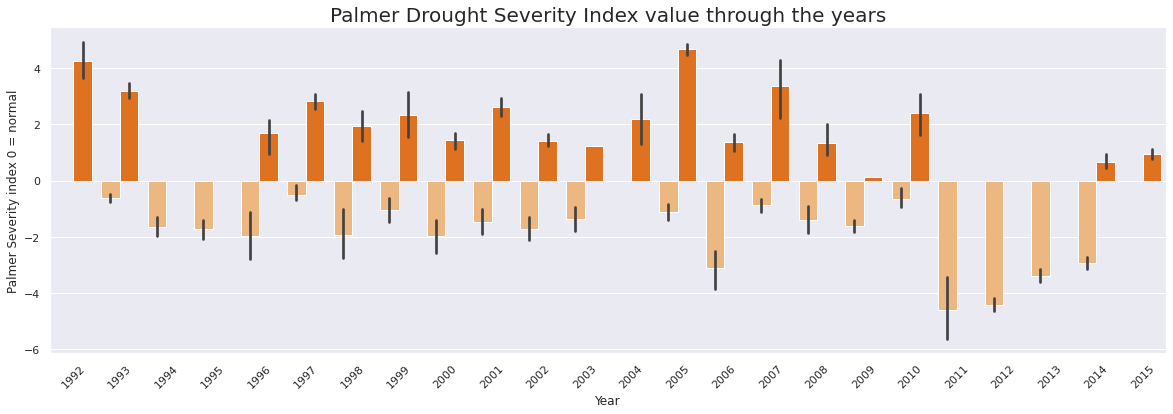

In [42]:
fig = plt.figure(figsize = (20,6))
ax = fig.add_subplot(111)
sns.barplot(x='x_label', y='Value', hue='anomaly symbol', data=df_drougth, ax=ax);
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel('Palmer Severity index 0 = normal')
plt.title("Palmer Drought Severity Index value through the years", fontsize=20)
ax.legend_.remove();

We can cleary se the drought there. It has been ranked as the worst of the last 127 year.

### Conclusion
Here we could set aside the possibility that this anomaly comme from a change in the way data are being recorded, indeed outside of drought season the data go back to normal.

This leaves us to a conjunction of factor to explain this data anomaly:
- Management of the power network different from the rest of the US
- Severe drought during this period
- Aging equipment maintained at the lowest possible level of security, and lower maintenance, any anomaly cause an incident

We can fear that the global warming leads to increase of powerline related wildfire because of higher frequency of drought phenomenon.


---
### Sources
- [HOW DO POWER LINES CAUSE WILDFIRES? - Texas Wildfire Mitigation Project - 2014](https://www.insurancejournal.com/news/southcentral/2011/09/29/217923.htm)
<sup>1</sup>: Why texas has its own power grid, August 18, 2011, [Slate](https://slate.com/news-and-politics/2003/08/why-texas-has-its-own-power-grid.html).
<sup>2</sup>: Power Utility Sued After Massive Texas Wildfire, September 29, 2011 [Insurance Journal](https://www.insurancejournal.com/news/southcentral/2011/09/29/217923.htm)

